In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df = pd.read_csv(r'C:\\Users\\Hp\\Documents\\Cleaning\\HR_Analytics.csv')
df.head(5)

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0.0


In [11]:
#Getting the columns for the dataset.
columns = list(df.columns)
print(columns)

['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'SalarySlab', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [12]:
#Check the data types.
print(df.dtypes)

EmpID                        object
Age                           int64
AgeGroup                     object
Attrition                    object
BusinessTravel               object
DailyRate                     int64
Department                   object
DistanceFromHome              int64
Education                     int64
EducationField               object
EmployeeCount                 int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
Gender                       object
HourlyRate                    int64
JobInvolvement                int64
JobLevel                      int64
JobRole                      object
JobSatisfaction               int64
MaritalStatus                object
MonthlyIncome                 int64
SalarySlab                   object
MonthlyRate                   int64
NumCompaniesWorked            int64
Over18                       object
OverTime                     object
PercentSalaryHike             int64
PerformanceRating           

In [13]:
#Check the distribution of missing values.
print(df.isnull().mean())

EmpID                       0.000000
Age                         0.000000
AgeGroup                    0.000000
Attrition                   0.000000
BusinessTravel              0.000000
DailyRate                   0.000000
Department                  0.000000
DistanceFromHome            0.000000
Education                   0.000000
EducationField              0.000000
EmployeeCount               0.000000
EmployeeNumber              0.000000
EnvironmentSatisfaction     0.000000
Gender                      0.000000
HourlyRate                  0.000000
JobInvolvement              0.000000
JobLevel                    0.000000
JobRole                     0.000000
JobSatisfaction             0.000000
MaritalStatus               0.000000
MonthlyIncome               0.000000
SalarySlab                  0.000000
MonthlyRate                 0.000000
NumCompaniesWorked          0.000000
Over18                      0.000000
OverTime                    0.000000
PercentSalaryHike           0.000000
P

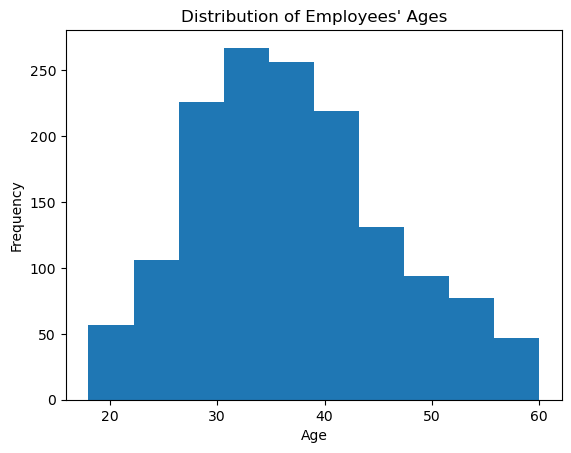

In [14]:
#1.	What is the distribution of employees' ages and how does it vary across different age groups?
ages = df['Age']

plt.hist(ages, bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Employees\' Ages')
plt.show()

In [20]:
#2.Is there a correlation between distance from home and attrition rate?
distance_from_home = df['DistanceFromHome']
attrition = df['Attrition']
data = pd.DataFrame({'DistanceFromHome': distance_from_home, 'Attrition': attrition})
data['Attrition'] = data['Attrition'].map({'Yes': 1, 'No': 0})
correlation = data['DistanceFromHome'].corr(data['Attrition'])
print("Correlation coefficient", correlation)

Correlation coefficient 0.08000648570804324


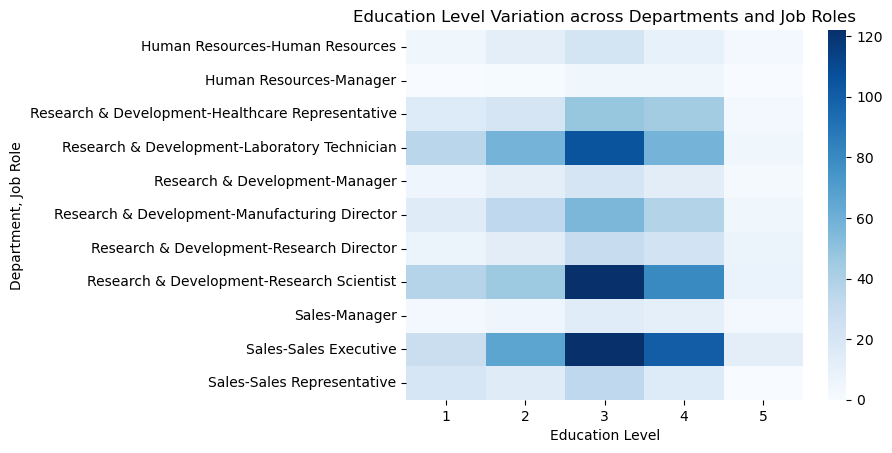

In [22]:
#3.How does the education level of employees vary across different departments and job roles?
sns.heatmap(pivot_table, cmap='Blues')
plt.xlabel('Education Level')
plt.ylabel('Department, Job Role')
plt.title('Education Level Variation across Departments and Job Roles')
plt.show()

In [25]:
pivot_table = pd.pivot_table(df, values='EmployeeCount', index=['Department', 'JobRole'], columns='Education', aggfunc='count', fill_value=0)
print(pivot_table)

Education                                          1   2    3    4   5
Department             JobRole                                        
Human Resources        Human Resources             5  12   22   10   3
                       Manager                     0   1    5    5   0
Research & Development Healthcare Representative  16  21   48   44   3
                       Laboratory Technician      35  58  105   58   5
                       Manager                     6  12   21   13   2
                       Manufacturing Director     15  33   56   38   5
                       Research Director           7  13   30   23   7
                       Research Scientist         37  46  122   80   8
Sales                  Manager                     3   6   14   11   3
                       Sales Executive            28  66  122  101  12
                       Sales Representative       20  15   33   16   0


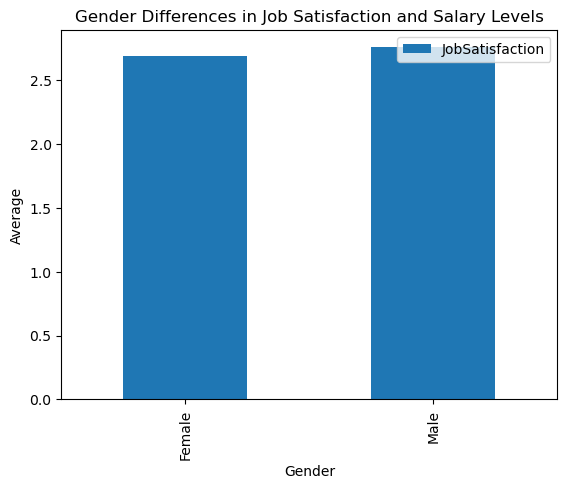

In [28]:
#4.Are there any gender differences in job satisfaction and salary levels?
data = df[['Gender', 'JobSatisfaction', 'SalarySlab']]
grouped_data = data.groupby('Gender').mean()

grouped_data.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Average')
plt.title('Gender Differences in Job Satisfaction and Salary Levels')
plt.show()

In [29]:
#5.What is the average monthly income of employees and how does it compare with their education level?
data = df[['Education', 'MonthlyIncome']]
grouped_data = data.groupby('Education').mean()
print(grouped_data)

           MonthlyIncome
Education               
1            5703.017442
2            6213.727915
3            6518.282007
4            6824.764411
5            8277.645833


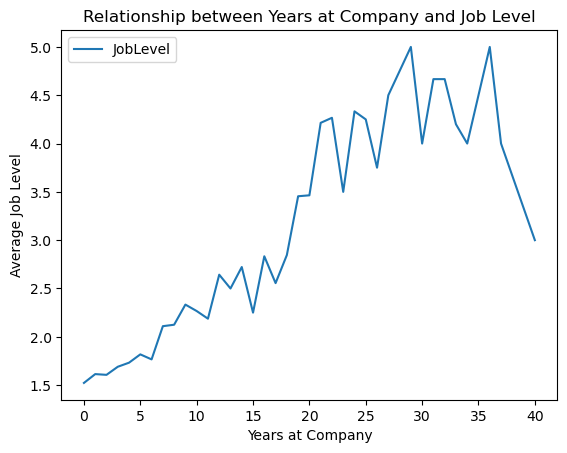

In [31]:
#6.Is there a relationship between the number of years an employee has worked at the company and their job level?
grouped_data.plot(kind='line')
plt.xlabel('Years at Company')
plt.ylabel('Average Job Level')
plt.title('Relationship between Years at Company and Job Level')
plt.show()

                   PercentSalaryHike
PerformanceRating                   
3                          14.008779
4                          21.841410


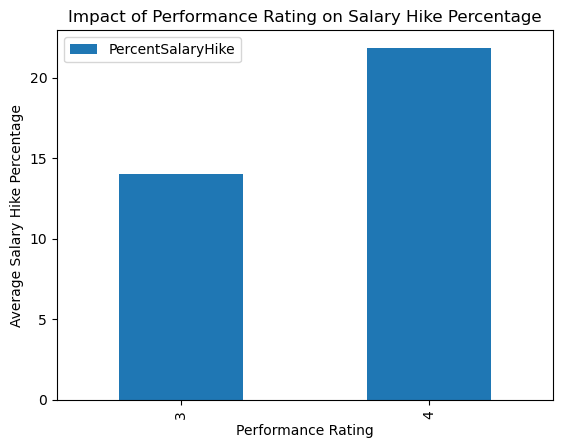

In [35]:
#7.How does the performance rating of employees impact their salary hike percentage?
data = df[['PerformanceRating', 'PercentSalaryHike']]
grouped_data = data.groupby('PerformanceRating').mean()
print(grouped_data)
grouped_data.plot(kind='bar')
plt.xlabel('Performance Rating')
plt.ylabel('Average Salary Hike Percentage')
plt.title('Impact of Performance Rating on Salary Hike Percentage')
plt.show()

In [38]:
#8.	Are employees who work overtime more likely to experience higher levels of job involvement and job satisfaction?
data = df[['OverTime', 'JobInvolvement', 'JobSatisfaction']]
grouped_data = data.groupby('OverTime').mean()
print(grouped_data)

          JobInvolvement  JobSatisfaction
OverTime                                 
No              2.730697          2.70904
Yes             2.727273          2.76555


In [39]:
#9.Is there a correlation between the number of training times in the past year and employees' work-life balance?
data = df[['TrainingTimesLastYear', 'WorkLifeBalance']]
correlation = data.corr()
print(correlation)

                       TrainingTimesLastYear  WorkLifeBalance
TrainingTimesLastYear               1.000000         0.027813
WorkLifeBalance                     0.027813         1.000000


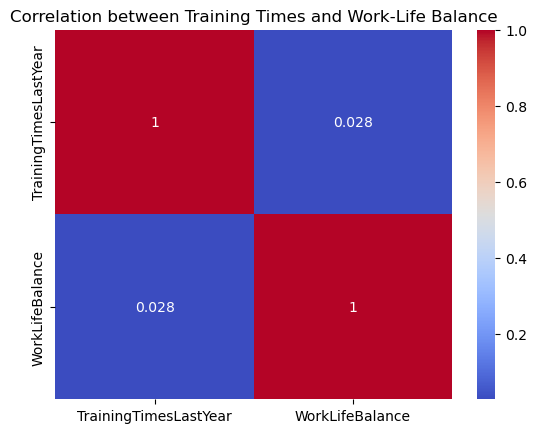

In [40]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Training Times and Work-Life Balance')
plt.show()

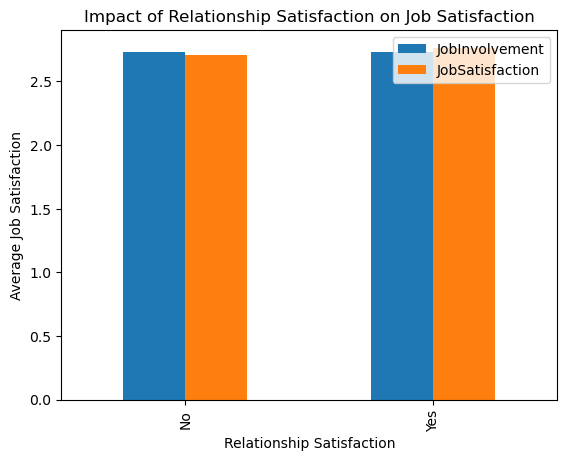

In [41]:
#10.	How does the satisfaction level of relationships impact employees' overall job satisfaction?
grouped_data.plot(kind='bar')
plt.xlabel('Relationship Satisfaction')
plt.ylabel('Average Job Satisfaction')
plt.title('Impact of Relationship Satisfaction on Job Satisfaction')
plt.show()